### Census data Analysis for City of Pittsburgh Neighborhoods (Hayden G. and Derek N.)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from fpsnippets import census_to_neighborhoods
from fpsnippets import geo_to_neighborhood
%matplotlib inline

### Here is what the data looks like

In [2]:
data = pd.read_csv("census.csv", sep=",")
data

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


---

### Print All Neighborhoods with Populations, With Total and Average

In [3]:
table = {}
for index, row in data.iterrows():
    table.update({row["Neighborhood"]: 0})

for index, row in data.iterrows():
    table[row["Neighborhood"]] = row["2020_Total_Population"]

    
for i in table:
    print(i + ": " + str(table[i]), end = " ")
    print()
avg = round(data["2020_Total_Population"].mean())
total = round(data["2020_Total_Population"].sum())
print("Average: " + str(avg))
print("Pittsburgh Total: " + str(total))

Allegheny Center: 1419 
Allegheny West: 540 
Allentown: 2305 
Arlington - Arlington Heights (Combined): 2040 
Banksville: 4127 
Bedford Dwellings: 1386 
Beechview: 7596 
Beltzhoover: 1604 
Bloomfield: 8665 
Bluff: 5882 
Bon Air: 759 
Brighton Heights: 7105 
Brookline: 13063 
California-Kirkbride: 709 
Carrick: 10290 
Central Business District (Downtown): 5477 
Central Lawrenceville: 4720 
Central Northside: 2972 
Central Oakland: 5835 
Chartiers City: 492 
Chateau: 19 
Crafton Heights: 3999 
Crawford-Roberts: 2293 
Duquesne Heights: 2397 
East Allegheny: 1903 
East Carnegie: 491 
East Hills: 2892 
East Liberty: 6187 
Elliott: 2193 
Esplen: 322 
Fairywood: 1092 
Fineview: 1140 
Friendship: 1963 
Garfield: 3643 
Glen Hazel: 659 
Greenfield: 7261 
Hays: 321 
Hazelwood: 3889 
Highland Park: 6235 
Homewood North: 2617 
Homewood South: 2260 
Homewood West: 642 
Knoxville: 3493 
Larimer: 1545 
Lincoln Place: 3155 
Lincoln-Lemington-Belmar: 3636 
Lower Lawrenceville: 2641 
Manchester: 2031 
Ma

### Plot The Data with the Population Percent

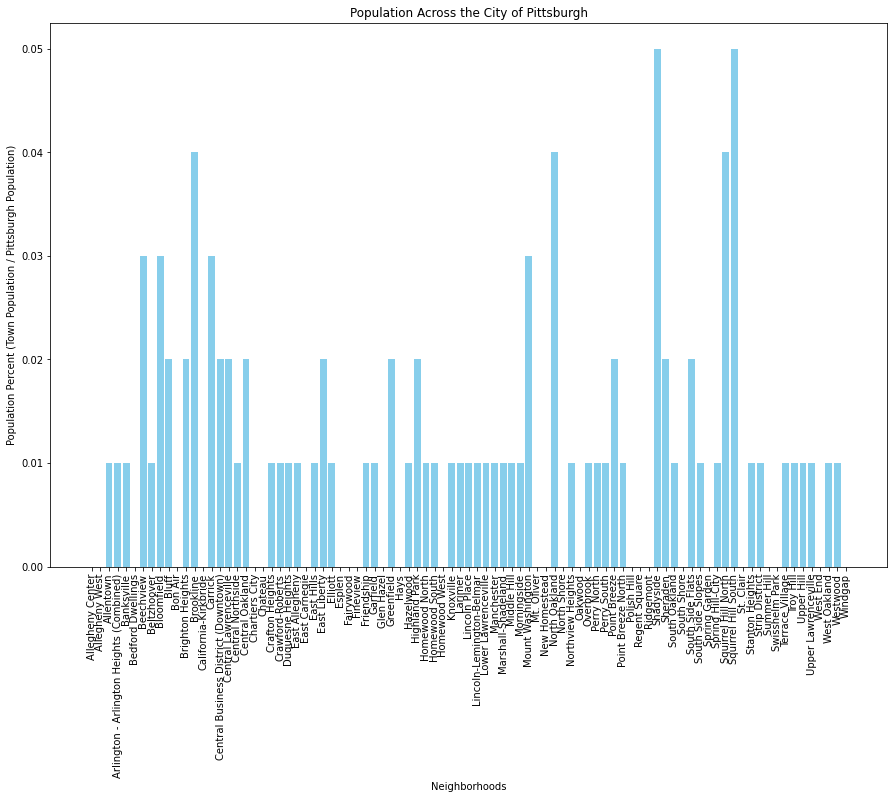

In [4]:
combined_data = {
    'Population': [],
    'Places': []
}

for i in table:
    newVal = round(table[i]/total, 2)
    combined_data["Population"].append(newVal)
    combined_data["Places"].append(i)


combined_df = pd.DataFrame(combined_data)
plt.figure(figsize=(15, 10))
plt.bar(combined_df['Places'], combined_df['Population'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Population Percent (Town Population / Pittsburgh Population)')
plt.title('Population Across the City of Pittsburgh')
plt.xticks(rotation=90)
plt.show()

### Diversity in Population 

In [5]:
newData = data

string = str(2010)
nlist = ["2020_OneRace_Population", "2020_Total_Population", "2020_White_Alone_Population"]
for column in newData.columns:
    
    column = str(column)
    result = column.find(string)
    if result != -1:
        nlist.append(column)
    else:
        continue
        
dropped = newData.drop(columns = nlist, inplace = False)
    
Neighborhoods = []
otherPops = []


table = {}


for i in dropped["Neighborhood"]:
    #print(i)
    Neighborhoods.append(i)

for index, row in dropped.iterrows():
    Neighborhood = row["Neighborhood"]
    valueSum = 0
    count = 0
    for i in row:
        if i == ["Neighborhood"]:
            continue
        elif type(i) == str:
            continue
        else:
            count = count + 1
            valueSum = valueSum + i
    
    table[Neighborhood] = round(valueSum/count,2)
        
for index, row in newData.iterrows():
    table[row["Neighborhood"]] = round(table[row["Neighborhood"]]/row["2020_White_Alone_Population"],2)
    
for i in table:
    print(i + ": " + str(table[i]), end = " ")
    print()
    
    
    


Allegheny Center: 0.16 
Allegheny West: 0.05 
Allentown: 0.13 
Arlington - Arlington Heights (Combined): 0.11 
Banksville: 0.05 
Bedford Dwellings: 3.81 
Beechview: 0.08 
Beltzhoover: 1.15 
Bloomfield: 0.05 
Bluff: 0.1 
Bon Air: 0.02 
Brighton Heights: 0.08 
Brookline: 0.03 
California-Kirkbride: 0.34 
Carrick: 0.07 
Central Business District (Downtown): 0.07 
Central Lawrenceville: 0.03 
Central Northside: 0.1 
Central Oakland: 0.05 
Chartiers City: 0.43 
Chateau: 0.13 
Crafton Heights: 0.11 
Crawford-Roberts: 0.99 
Duquesne Heights: 0.02 
East Allegheny: 0.08 
East Carnegie: 0.07 
East Hills: 5.92 
East Liberty: 0.22 
Elliott: 0.11 
Esplen: 0.13 
Fairywood: 0.15 
Fineview: 0.22 
Friendship: 0.11 
Garfield: 0.39 
Glen Hazel: 0.33 
Greenfield: 0.04 
Hays: 0.06 
Hazelwood: 0.17 
Highland Park: 0.07 
Homewood North: 5.09 
Homewood South: 4.84 
Homewood West: 3.71 
Knoxville: 0.31 
Larimer: 0.93 
Lincoln Place: 0.02 
Lincoln-Lemington-Belmar: 1.35 
Lower Lawrenceville: 0.04 
Manchester: 0

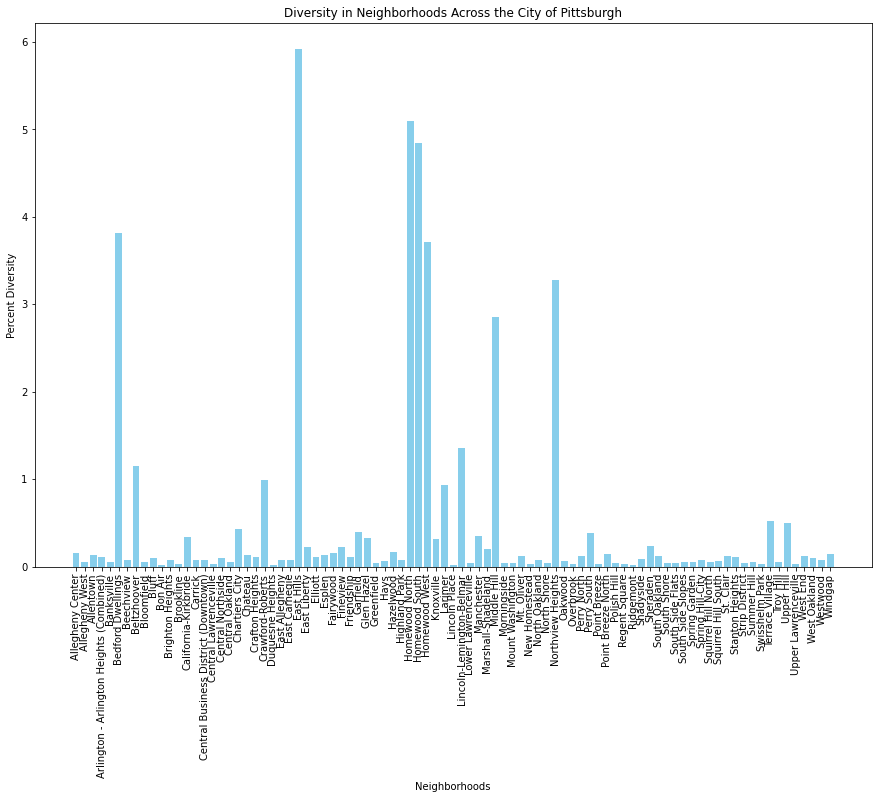

In [6]:
combined_data = {
    'Population': [],
    'Places': []
}

for i in table:
    newVal = round(table[i], 2)
    combined_data["Population"].append(newVal)
    combined_data["Places"].append(i)


combined_df = pd.DataFrame(combined_data)
plt.figure(figsize=(15, 10))
plt.bar(combined_df['Places'], combined_df['Population'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel("Percent Diversity")
plt.title('Diversity in Neighborhoods Across the City of Pittsburgh')
plt.xticks(rotation=90)
plt.show()